In [2]:
from astropy.constants import G
import astropy.coordinates as coord
import astropy.table as at
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
%matplotlib inline
import numpy as np

In [3]:
tbl = at.Table.read("Eilers2019-circ-velocity.txt", format='ascii.basic')

In [4]:
tbl.colnames

['R', 'v_c', 'err+', 'err-']

<ErrorbarContainer object of 3 artists>

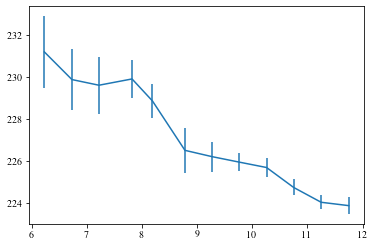

In [5]:
idx = (tbl['R'] >= 6) & (tbl['R'] < 12)
plt.errorbar(tbl['R'][idx], tbl['v_c'][idx], tbl['err+'][idx])

In [6]:
X = np.vander(tbl['R'][idx], N=2)
Cinv = np.diag(1 / np.full(idx.sum(), 3.)**2)

In [7]:
d_vc_d_R, vc0 = np.linalg.solve(X.T @ Cinv @ X, X.T @ Cinv @ tbl['v_c'][idx])
d_vc_d_R = d_vc_d_R * u.km/u.s/u.kpc
vc0 = vc0 * u.km/u.s

In [8]:
R = np.linspace(5, 12, 128) * u.kpc
vc = vc0 + d_vc_d_R * R
Rterm = 2 * vc / R * d_vc_d_R
Rterm

<Quantity [-128.31359948, -126.87310601, -125.46368635, -124.08434577,
           -122.73413153, -121.41213073, -120.1174682 , -118.84930462,
           -117.60683465, -116.38928528, -115.1959142 , -114.02600828,
           -112.87888216, -111.75387694, -110.65035886, -109.56771815,
           -108.50536789, -107.46274296, -106.43929905, -105.43451167,
           -104.44787529, -103.47890247, -102.52712308, -101.59208354,
           -100.67334605,  -99.77048798,  -98.88310116,  -98.0107913 ,
            -97.1531774 ,  -96.30989117,  -95.48057655,  -94.66488916,
            -93.86249587,  -93.07307429,  -92.29631239,  -91.53190807,
            -90.77956875,  -90.03901104,  -89.30996033,  -88.59215048,
            -87.88532352,  -87.18922929,  -86.50362518,  -85.82827582,
            -85.16295287,  -84.50743467,  -83.86150608,  -83.2249582 ,
            -82.59758815,  -81.97919885,  -81.36959884,  -80.76860206,
            -80.17602765,  -79.59169981,  -79.01544757,  -78.44710468,
      

In [9]:
z = 1*u.kpc
(Rterm * z).to(u.km/u.s/u.Myr)

<Quantity [-0.13122788, -0.12975467, -0.12831324, -0.12690257, -0.12552169,
           -0.12416966, -0.1228456 , -0.12154863, -0.12027794, -0.11903274,
           -0.11781226, -0.11661579, -0.11544261, -0.11429205, -0.11316347,
           -0.11205624, -0.11096976, -0.10990345, -0.10885677, -0.10782916,
           -0.10682011, -0.10582913, -0.10485574, -0.10389946, -0.10295986,
           -0.10203649, -0.10112895, -0.10023683, -0.09935974, -0.0984973 ,
           -0.09764915, -0.09681493, -0.09599432, -0.09518697, -0.09439256,
           -0.0936108 , -0.09284137, -0.09208399, -0.09133838, -0.09060427,
           -0.08988139, -0.08916949, -0.08846831, -0.08777762, -0.08709719,
           -0.08642678, -0.08576618, -0.08511518, -0.08447356, -0.08384112,
           -0.08321768, -0.08260303, -0.081997  , -0.0813994 , -0.08081006,
           -0.08022881, -0.07965548, -0.07908992, -0.07853196, -0.07798145,
           -0.07743825, -0.07690221, -0.07637319, -0.07585106, -0.07533567,
           -

In [10]:
Rgs = np.load('/Users/dhortadarrington/Documents/Projects/orbital-torus-imaging/py/sav/force-law/Rgs.npy',allow_pickle=True)
# zs = np.load('/Users/dhortadarrington/Documents/Projects/orbital-torus-imaging/py/sav/force-law/zs.npy',allow_pickle=True)
Kzs = np.load('/Users/dhortadarrington/Documents/Projects/orbital-torus-imaging/py/sav/force-law/Kz_mg_zs_20radbins_25boot_20zs-torusimaging.npy',allow_pickle=True)
sigmas = np.load('/Users/dhortadarrington/Documents/Projects/orbital-torus-imaging/py/sav/force-law/sigma_mg_zs_20radbins_25boot_20zs-torusimaging.npy',allow_pickle=True)


In [11]:
Kzs = Kzs*(u.kpc/u.Myr**2)
Kzs = Kzs.to(u.km/u.s/u.Myr)


In [12]:
Rgs = np.load('/Users/dhortadarrington/Documents/Projects/orbital-torus-imaging/py/sav/force-law/Rgs.npy',allow_pickle=True)
zs = np.load('/Users/dhortadarrington/Documents/Projects/orbital-torus-imaging/py/sav/force-law/zs.npy',allow_pickle=True)


In [13]:
zs = np.linspace(0.1,2.1,21)
print(np.shape(Kzs))

(3, 20, 20)


In [14]:
azs_mg = Kzs[1]
print(np.shape(azs_mg))

#pick the az at z=1 kpc to compare
azs_mg_z1kpc = azs_mg[:,7]

(20, 20)


Text(0, 0.5, '$\\frac{2 v_c}{R} \\frac{{\\rm d}v_c}{{\\rm d}R}  |z|$ @ $z=1~{\\rm kpc}$ [km/s/Myr]')

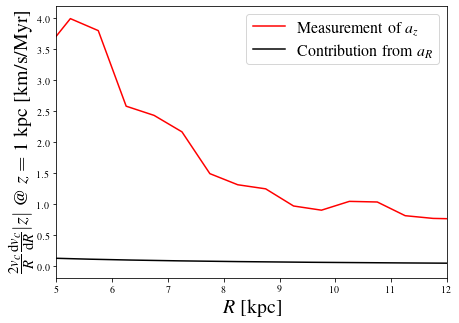

In [19]:
plt.figure(figsize=(7, 5),facecolor='white')
plt.plot(Rgs,(np.abs(azs_mg_z1kpc)),color='r',label='Measurement of $a_z$')
plt.plot(R, np.abs(Rterm * z).to(u.km/u.s/u.Myr), marker='',label='Contribution from $a_R$',color='k')
plt.xlim(5,12)
plt.legend(fontsize=16)
plt.xlabel("$R$ [kpc]",fontsize=20)
plt.ylabel(r"$\frac{2 v_c}{R} \frac{{\rm d}v_c}{{\rm d}R}  |z|$ @ $z=1~{\rm kpc}$ [km/s/Myr]",fontsize=20)

Text(0, 0.5, '$\\frac{1}{4\\pi G}\\frac{2 v_c}{R} \\frac{{\\rm d}v_c}{{\\rm d}R}$ [$\\mathrm{M_{\\odot}\\,pc^{-3}}$]')

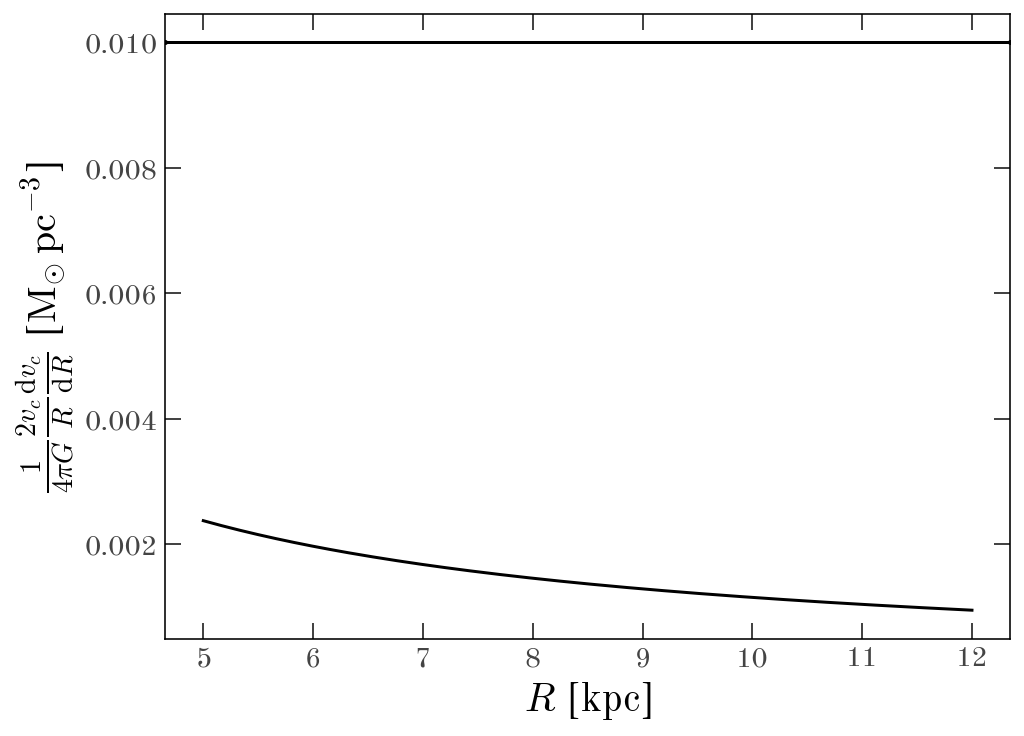

In [29]:
plt.figure(figsize=(7, 5))
plt.plot(R, np.abs(Rterm / (4 * np.pi * G)).to(u.Msun / u.pc**3), marker='')
plt.axhline(0.01)
# plt.axhline(0.2)
plt.xlabel("$R$ [kpc]")
plt.ylabel(r"$\frac{1}{4\pi G}\frac{2 v_c}{R} \frac{{\rm d}v_c}{{\rm d}R}$ " + f"[{u.Msun/u.pc**3:latex_inline}]")

Text(0, 0.5, '$\\frac{2 v_c}{\\pi G R} \\frac{{\\rm d}v_c}{{\\rm d}R}  |z|$ @ $z=1~{\\rm kpc}$')

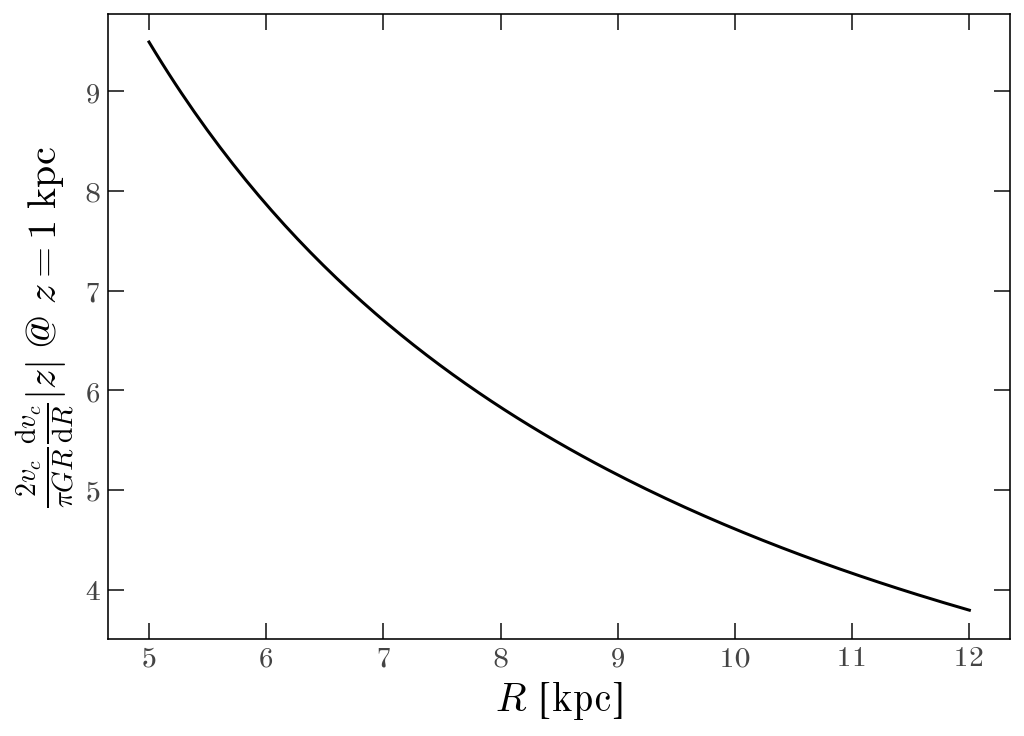

In [87]:
plt.figure(figsize=(7, 5))
plt.plot(R, np.abs(Rterm * z / (np.pi * G)).to(u.Msun / u.pc**2), marker='')
plt.xlabel("$R$ [kpc]")
plt.ylabel(r"$\frac{2 v_c}{\pi G R} \frac{{\rm d}v_c}{{\rm d}R}  |z|$ @ $z=1~{\rm kpc}$")

In [89]:
(1.3e-1*u.kpc/u.Gyr).to(u.km/u.s)

<Quantity 0.12711299 km / s>